# Homework Assignment: Brownian Motion and Itô Calculus  

#### By Maksim Kuptsov, 231

# **Block 1: Theory**

**Q1. (2 points)**  

(a) State the definition of a standard Brownian Motion $W_t$.  

(b) Prove that  

$$
\mathrm{Cov}(W_t, W_s) = \min(s,t).
$$  

(c) Explain in 2–3 sentences why Brownian motion is continuous but almost surely nowhere differentiable.   

**Solution:**


**(a)** Bownian motion is a stochastic process $(W_t)_{t\ge0}$ satisfying 4 conditions:

1. $W_0=0$ almost surely
2. Increments $W_{t}-W_{s}$ are independent, that is $(W_{t}-W_{s}) \perp \mathcal F_s, 0\le s < t$
3. $W_t-W_s \sim N(0,t-s)$
4. Continuous path almost surely.

Intuitively, it means the process has no trend and the variance grows linearly in time. Moreover, what will happen does not depend on what happend already.

**(b)**
Notice that
$$W_t-W_s \sim N(0,t-s) \implies \mathbb{E}[W_t-W_s]=0;$$
$$(\mathbb{E}[W_t - W_s]=0 \land W_0=0) \implies \forall k \hspace{0.2cm} \mathbb{E}[W_k]=0;$$
$$W_t-W_s \text{ is independent of } W_s.$$

Therefore, for $t \ge s$ we have
$$\mathrm{Cov}(W_t, W_s)=\mathbb{E}[W_tW_s]-\mathbb{E}[W_t]\mathbb{E}[W_s]=\mathbb{E}[W_tW_s]=\mathbb{E}[((W_t-W_s)+W_s)W_s]= \newline =\mathbb{E}[(W_t-W_s)W_s] + \mathbb{E}[W_s^2]=\mathbb{E}[W_t-W_s]\mathbb{E}[W_s] + \mathbb{E}[W_s^2] = \mathbb{E}[W_s^2] = \mathrm{Var}(W_s) = s.$$

Analagously, for $s \ge t$ we obtain
$$\mathrm{Cov}(W_t, W_s)=t.$$

So we get
$$\mathrm{Cov}(W_t, W_s)=\min(s, t).$$

**(c)**
Motion is continuous by definition.
$$W_{t+h}-W_t \sim N(0,h) \newline \implies \newline \mathrm{Var}\left(\frac{W_{t+h}-W_t}{h}\right)=\frac{\mathrm{Var}(W_{t+h}-W_t)}{h^2} = \frac{h}{h^2} = \frac{1}{h} \newline \implies \newline \frac{W_{t+h}-W_t}{h} \sim N\left(0, \frac{1}{h}\right).$$

$\frac{1}{h} \rightarrow \infty \text{ as } h \rightarrow 0$, which means that for small h the slope does not converge; thus no limit exists and, consequently, the function is not differentiable.

**Q2. (1.5 points)**  

Show that Brownian motion is a martingale with respect to its natural filtration $\mathcal{F}_t$.  
Provide the proof.

For $t>s$
$$\mathbb{E}[W_t|\mathcal F_s]=\mathbb{E}[(W_t-W_s)+W_s|\mathcal F_s]=\mathbb{E}[(W_t-W_s)]+W_s=W_s$$
Thus the best approximation of the next value is the current value and Brownian motion $(W_t)_{t\ge0}$ ia martingale.

**Q3. (1.5 points)**  

Let $X_t = \mu t + \sigma W_t$ (Brownian motion with drift).  
Apply Itô’s Formula to $f(x) = x^2$.  

(a) Derive $d(X_t^2)$.  
(b) Show explicitly which terms come from drift $\mu$ and which from diffusion $\sigma$.  
(c) Interpret financially what the additional drift term represents compared to the pure Brownian case.

**(a)**


Considering that $\hspace{0.2cm} dX_t = \mu dt + \sigma dW_t \hspace{0.2cm}$ and $ \hspace{0.2cm} d[X]_t = \sigma^2dt, \hspace{0.2cm}$ we get

$$d(X_t^2) = df(X_t) = f^\prime(X_t)dX_t + \frac{1}{2}f^{\prime\prime}(X_t)d[X]_t = \newline = 2X_tdX_t + d[X]_t = 2X_t(\mu dt + \sigma dW_t) + \sigma^2dt = (2\mu X_t + \sigma^2)dt + 2\sigma X_tdW_t$$

**(b)**

Terms coming from drift: $\hspace{0.2cm} 2\mu X_t dt$

Terms coming from diffusion: $\hspace{0.2cm} \sigma^2dt, \hspace{0.2cm} 2\sigma X_tdW_t$

**(c)**

$X_t^2$ can be viewed as a measure of volatility. While $\sigma$ creates random fluctuations around the trend, $\sigma^2dt$ represents the cumulative effect of these fluctuations. The noise increases volatility over time, consequently increasing the expected value of $X_t^2$.

In other words, even if $\mathbb{E}[X_t]=0$ (no motion in average), $\mathbb{E}[X_t^2]$ (how far it goes) grows over time.

# **Block 2: Simulations**

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

**Q4. (2 points)**  

Simulate $M=1000$ paths of standard Brownian motion on $[0,1]$.  

(a) For each path, compute the quadratic variation approximation  

$$
QV^n_1 = \sum_{i=1}^n (W_{t_i} - W_{t_{i-1}})^2
$$  

with increasing discretization levels $n$.  

(b) Plot the distribution of $QV^n_1$ for different $n$ and compare with the theoretical limit $\langle W \rangle_1 = 1$.  

(c) Interpret the result: why can quadratic variation be viewed as a natural measure of “volatility/risk” of Brownian paths?  


**(a)**

In [2]:
# Standard Brownian motion
def bm(t, n, x0=0, mu=0, sigma=1):
    dt = t/n
    return np.cumsum(np.concatenate([[0], np.random.randn(n)*sigma*sqrt(dt) + mu*dt]))

In [3]:
# Quadratic variation approximation
def qv(path, n) -> float:
    # n evenly spaced indexes and 0; len(path)-1 is the init num of steps
    indexes = np.linspace(0, len(path)-1, n+1, dtype=int)
    res = 0
    for i in range(1, len(indexes)):
        res += (path[indexes[i]] - path[indexes[i-1]])**2
    return res

Practically, ``variations`` DataFrame is the answer (I consider 50 different values of $n$):

In [4]:
T = 1       # time interval [0, T]
n = 500     # num of steps
M = 1000    # num of paths
t = np.linspace(0, T, n+1)
n_space = np.linspace(1, n, 50, dtype=int) # Values of n to consider

# For each path, for each value of n_space calculate qv
variations = pd.DataFrame(columns=['n']+list(range(1, M+1)))
variations['n'] = n_space
for i in range(1, M+1):
    path = bm(T, n)
    for j in range(len(n_space)):
        variations.loc[j, i] = qv(path, n_space[j])
variations

,n,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,1,1.673474,0.401079,0.532669,0.2699,0.002337,3.224564,0.000209,2.910968,1.815032,...,6.590366,0.876507,1.177138,0.067413,0.086332,0.866313,0.442318,0.529958,2.343497,0.467847
1,11,1.494085,1.180139,1.013717,1.250179,0.792088,1.34084,1.264108,1.208592,1.005212,...,1.000825,0.620766,1.121484,0.933586,1.814689,1.107586,0.695785,1.236915,0.970604,0.456265
2,21,1.783111,0.804406,0.85364,0.99779,1.048864,0.81781,1.263212,1.22534,0.935445,...,1.013861,0.847948,1.344948,1.385479,0.978791,0.989663,0.780483,0.988689,0.927034,0.791404
3,31,1.755559,0.859576,0.859712,1.096168,0.955643,1.380917,1.075763,1.300661,0.933446,...,1.284835,1.151551,1.369516,1.069634,1.010533,0.806435,0.873169,1.225241,1.029858,0.921901
4,41,1.625519,0.876165,0.858692,1.007669,1.2019,1.166711,1.411763,1.154709,0.947699,...,0.888578,1.035278,1.075882,1.163675,1.163694,0.946381,0.739294,1.410847,0.937381,0.813432
5,51,1.618297,0.793039,0.795674,1.119053,1.349786,1.027562,1.424935,0.973034,0.975362,...,0.844451,0.849694,1.041371,1.041458,1.012118,0.760733,0.755104,1.263947,1.143972,0.895312
6,62,1.665496,0.814525,0.865646,0.988466,0.9665,1.056187,1.266215,1.001819,0.766177,...,1.070498,1.156062,1.41218,0.918553,0.992958,1.016409,0.903733,1.043889,1.131705,0.818633
7,72,1.400442,0.696118,0.876385,1.199371,1.354358,1.228121,1.260595,1.092655,0.95597,...,0.905505,1.029652,1.26088,1.448849,0.759954,0.883168,0.815317,1.274415,1.213547,0.934913
8,82,1.337107,0.917211,0.817316,1.042348,1.014433,0.998847,1.279831,0.933332,0.852478,...,0.934692,1.020076,1.127462,1.215337,1.007928,0.899011,0.663362,1.073372,1.191403,0.987985
9,92,1.389967,0.906832,0.808435,0.964578,1.138318,1.155396,1.132449,0.945297,0.964715,...,1.109718,1.18716,1.213528,1.041609,0.997512,0.919427,0.846712,0.967545,1.019618,0.993469


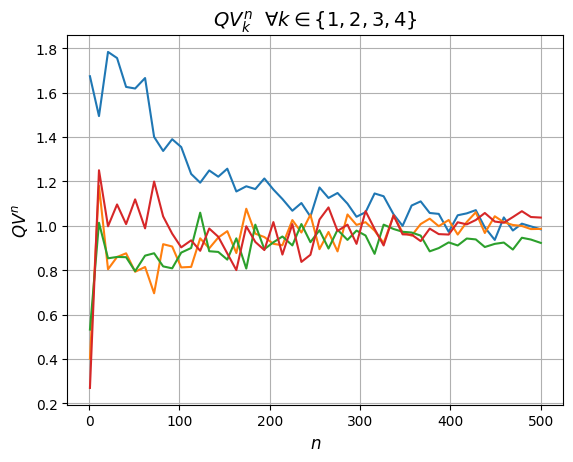

In [5]:
for i in range(1, 5):
    plt.plot(n_space, variations[i])
plt.title(r'$QV_k^n \text{  } \forall k \in \{1, 2, 3, 4\}$', fontsize=14)
plt.xlabel('$n$', fontsize=12); plt.ylabel('$QV^n$', fontsize=12)
plt.grid(True)
plt.show()

**(b)**

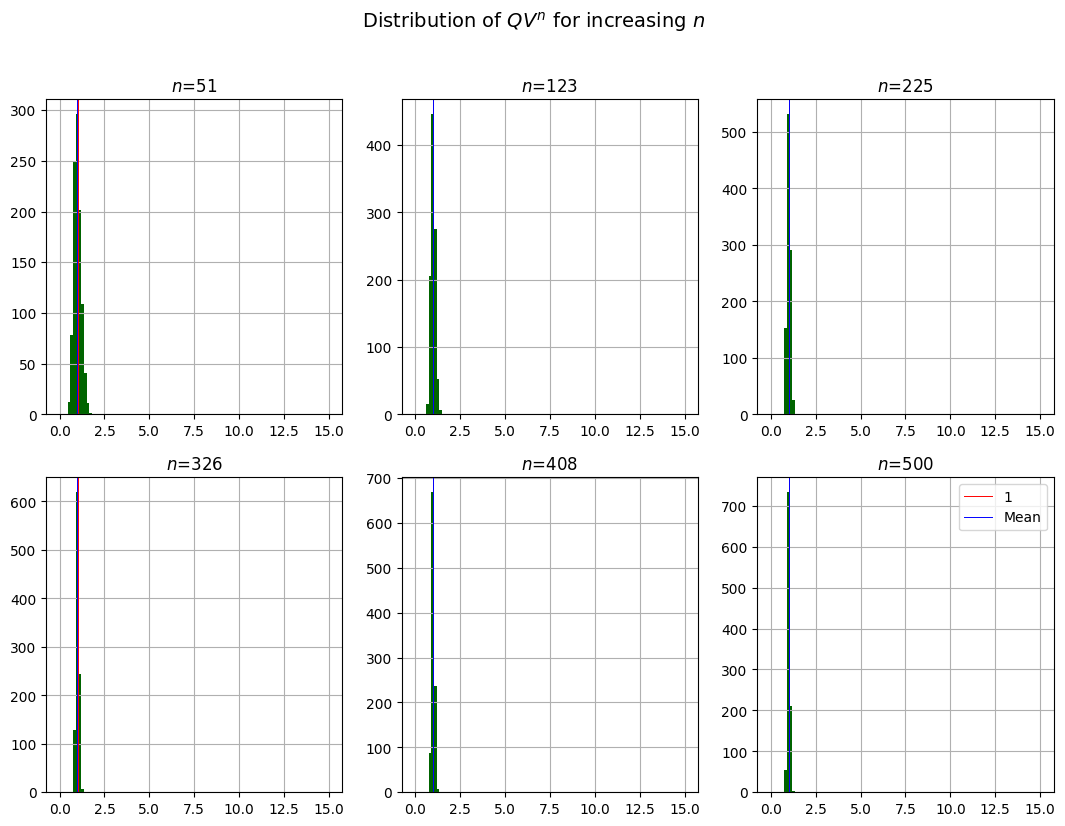

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(13, 9))
fig.suptitle('Distribution of $QV^n$ for increasing $n$', fontsize=14)

#TODO: Choose n_plot values automatically.
# Current values are certain for n=500. If you change n, it is likely to break
n_plot = [51, 123, 225, 326, 408, 500]
for i in range(len(n_plot)):
    plot = axes[i//3][i%3]
    qvn = variations[variations['n'] == n_plot[i]].drop('n', axis=1).iloc[0]

    plot.hist(qvn, bins=100, range=(0, 15), color='darkgreen')
    plot.axvline(1, color='red', linewidth=0.7, label='1')
    plot.axvline(qvn.mean(), color='blue', linewidth=0.7, label='Mean')
    plot.set_title(f'$n$={n_plot[i]}', fontsize=12)
    plot.grid(True)

plt.legend()
plt.show()

We can see that the emperical means coincide with the theoretical limit $\langle W \rangle_1 = 1$.

**(c)**

QV be viewed as a natural measure of volatility, because the sum of squared increments captures **how actively the random path moves** over the period, which actually is the gist of volatility (the degree of randomness). Naturally, volatility is associated with risk.

**Q5. (1.5 points)**  

Consider the strategy  

$$
\varphi_t = \alpha + \beta W_t,
$$  

with $\alpha=1$, $\beta=0.5$.  

(a) Simulate the gain from trading up to $T=1$:  

$$
G_T = \int_0^T \varphi_s \, dW_s.
$$  

(b) Approximate this Itô integral numerically for 5000 paths.  

(c) Compare the empirical variance of $G_T$ with the theoretical variance given by Itô isometry:  

$$
\mathrm{Var}(G_T) = \mathbb{E}[G_T^2] = \int_0^T (\alpha + \beta W_s)^2 \, ds.
$$  

(d) Financial interpretation: explain how the choice of $\alpha, \beta$ changes the exposure to risk.  

**(a)**

In [7]:
alpha = 1
beta = 0.5

def strategy(W_t, alpha=alpha, beta=beta) -> float:
    return alpha + beta*W_t

In [8]:
def ito_integral(strategy, W, t) -> tuple:
    '''
    Itô integral discrete approximation.
    strategy - Function of W_t that calcs the inventory at time t.
    W - Brownian motion.
    t - timestamps.
    '''

    dW = np.diff(W) # W_t - W(t-1) for every t
    dW = np.insert(dW, 0, 0.0)

    # phi_t for every t
    H_t = np.zeros_like(t)
    for i in range(len(t)):
        H_t[i] = strategy(W[i])

    # ito integrals for every t and phi for every t respectively
    return np.cumsum(H_t * dW), H_t

Test and visualize on some random path:

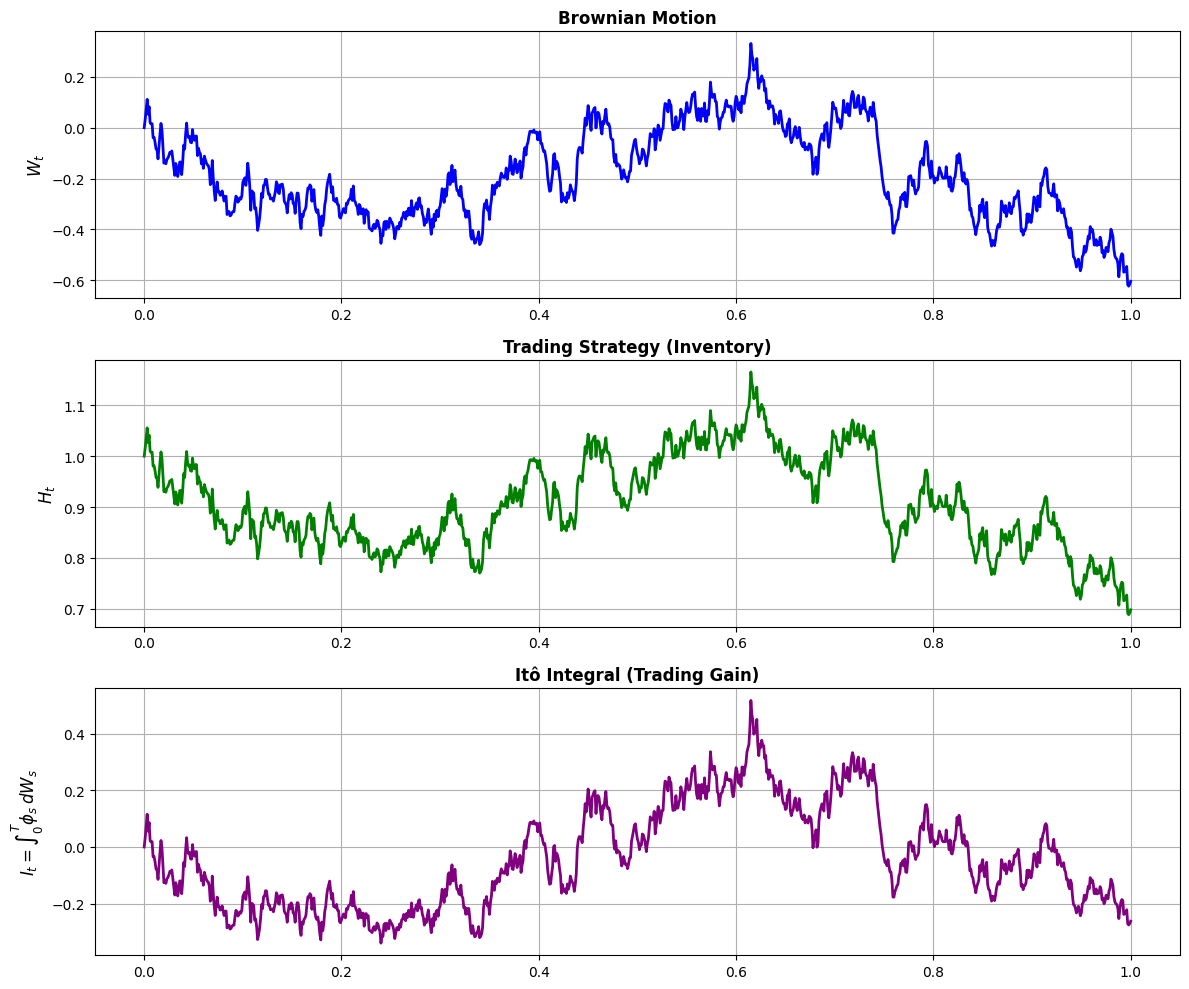

Values at final time T=1.0:
W_T = -0.6044880089671826
H_T = 0.6977559955164088
I_T = -0.2616097756149524


In [9]:
# Hyperparameters
T = 1.0
n = 1000
t = np.linspace(0, T, n+1)
W = bm(T, n)

I, H = ito_integral(strategy, W, t)

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(t, W, 'b-', linewidth=2)
axes[0].set_ylabel('$W_t$', fontsize=12)
axes[0].set_title('Brownian Motion', fontsize=12, fontweight='bold')
axes[0].grid(True)
axes[1].plot(t, H, 'g-', linewidth=2)
axes[1].set_ylabel('$H_t$', fontsize=12)
axes[1].set_title('Trading Strategy (Inventory)', fontsize=12, fontweight='bold')
axes[1].grid(True)
axes[2].plot(t, I, 'purple', linewidth=2)
axes[2].set_ylabel(r'$I_t = \int_0^T \phi_s \, dW_s$', fontsize=12)
axes[2].set_title('Itô Integral (Trading Gain)', fontsize=12, fontweight='bold')
axes[2].grid(True)
plt.tight_layout()
plt.show()

print(f'Values at final time T={T}:')
print(f'W_T = {W[-1]}')
print(f'H_T = {H[-1]}')
print(f'I_T = {I[-1]}')

**(b)**

In [10]:
M = 5000

integrals = np.zeros(M)
for i in range(M):
    path = bm(T, n)
    integrals[i] = ito_integral(strategy, path, t)[0][-1]

integrals = pd.DataFrame({
    'path': np.arange(1, M+1),
    'itô integral approximation': integrals
}).set_index('path')
integrals

,itô integral approximation
path,
1,0.617112
2,-0.160062
3,-0.641247
4,-0.039915
5,-0.000386
...,...
4996,1.234826
4997,1.020975
4998,-0.607586


**(c)**

Considering itô isometry and that $\mathbb{E}[W_s] = 0$ and $\mathbb{E}[W_s^2] = s$ we have
$$
\mathrm{Var}(G_T) = \mathbb{E}[G_T^2] = \mathbb{E}[(\int_0^T \varphi_s \, dW_s)^2] = \mathbb{E}[\int_0^T (\alpha + \beta W_s)^2 \, ds] = \int_0^T \mathbb{E}[\alpha^2 + 2\alpha\beta W_s + \beta^2 W_s^2] \, ds = \newline = \int_0^T (\alpha^2 + \beta^2 s) \, ds = \alpha^2 T + \frac{1}{2}\beta^2 T^2
$$

In [11]:
emp_var = integrals['itô integral approximation'].var()
theoretical_var = alpha**2*T + 0.5 * beta**2 * T**2

print(f'Empirical variance = {emp_var}')
print(f'Theoretical variance = {theoretical_var}')

Empirical variance = 1.1123981500298936
Theoretical variance = 1.125


**(d)**

$\mathrm{Var}(G_T)$ - the degree of uncertainty about final gain - is actually the measure of risk. The higher it is, the more risk we accept. Consequently, the higher values of $\alpha$ and $\beta$ are, the higher risk is. While $\alpha$ is a constant risk exposure, $\beta$ is our sensitivity to random price moves.

Positive correlation between $\alpha$ and $\beta$ and the level of risk is actually intuitive - if we hold more of an asset, we are more exposed to price fluctuations. The formula for $\mathrm{Var}(G_T)$ reveals exact dependence.

**Q6. (1.5 points)**  

Model an asset price by Geometric Brownian Motion (GBM):  

$$
S_t = S_0 \exp\left( \left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t \right).
$$  

Parameters: $S_0=100, \mu=0.1, \sigma=0.2, T=1$.  

(a) Simulate 1000 terminal prices $S_T$.  

(b) Plot the histogram and compare with the theoretical lognormal distribution.  

(c) Compute the empirical mean and variance and check against the formulas:  

$$
\mathbb{E}[S_T] = S_0 e^{\mu T},
\qquad
\mathrm{Var}(S_T) = S_0^2 e^{2\mu T}(e^{\sigma^2 T}-1).
$$  

(d) Interpretation: why is $S_t>0$ always, and why is this property important for financial modeling?  

In [12]:
# Geometric Brownian motion
def gbm(t, n, x0=1, mu=0, sigma=1):
    return x0*np.exp(bm(t, n, 0, mu-sigma**2/2, sigma))

**(a)**

In [13]:
# Hyperparameters
x0_gbm = 100
mu_gbm = 0.1
sigma_gbm = 0.2
T_gbm = 1.0
M = 1000

terminal_prices = np.zeros(M)
for i in range(M):
    terminal_prices[i] = gbm(T_gbm, 500, x0=x0_gbm, mu=mu_gbm, sigma=sigma_gbm)[-1]

terminal_prices = pd.DataFrame({
    'path': np.arange(1, M+1),
    'S_T': terminal_prices
}).set_index('path')
terminal_prices

,S_T
path,
1,91.487413
2,103.634100
3,116.425985
4,116.593897
5,132.529065
...,...
996,108.258054
997,122.131629
998,119.233480


**(b)**

A random variable is log-normally distributed if its natural logarithm follows a normal distribution.
$$S_t = S_0 \exp\left( \left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t \right)$$
$$\text{ln}(S_t) = \text{ln}(S_0) + \left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t$$
Considering that $W_t \sim N(0, t)$,
$$\text{ln}(S_t) \sim N\left(\text{ln}(S_0) + \left(\mu - \tfrac{1}{2}\sigma^2\right)t, \text{  }\sigma^2 t \right)$$
$$S_t \sim \text{LogNorm}\left(\text{ln}(S_0) + \left(\mu - \tfrac{1}{2}\sigma^2\right)t, \text{  }\sigma^2 t \right)$$
In our particular case $t = T$, so
$$S_T \sim \text{LogNorm}\left(m, s^2\right) \text{, where } m = \text{ln}(S_0) + \left(\mu - \tfrac{1}{2}\sigma^2\right)T \text{ and } s^2 = \sigma^2T$$

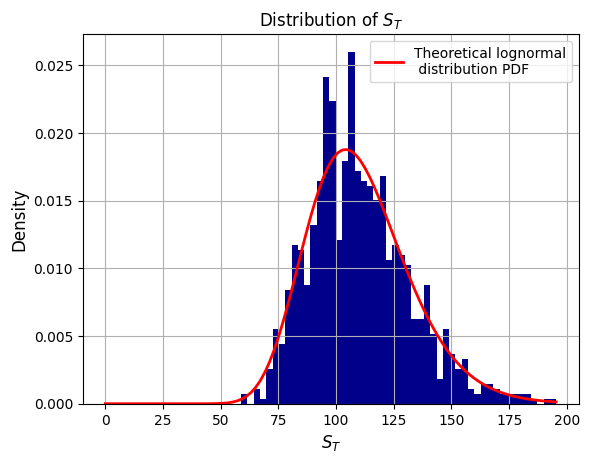

In [14]:
# Generate the x-axis
x = np.linspace(0, np.max(terminal_prices['S_T']), 100)

m = np.log(x0_gbm) + (mu_gbm - 0.5*sigma_gbm**2)*T_gbm
s2 = sigma_gbm**2*T_gbm
theoretical_dist = stats.lognorm(s=np.sqrt(s2), scale=np.exp(m)).pdf(x)

plt.plot(x, theoretical_dist, label='Theoretical lognormal\n distribution PDF', color='red', linewidth=2)
plt.hist(terminal_prices['S_T'], bins=50, density=True, color='darkblue')

plt.xlabel('$S_T$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of $S_T$')
plt.legend()
plt.grid(True)
plt.show()

**(c)**

In [15]:
emp_mean_gbm = terminal_prices['S_T'].mean()
emp_var_gbm = terminal_prices['S_T'].var()

theoretical_mean_gbm = x0_gbm * np.exp(mu_gbm*T)
theoretical_var_gbm = x0_gbm**2 * np.exp(2*mu_gbm*T) * (np.exp(sigma_gbm**2*T)-1)

print(f'Empirical mean = {emp_mean_gbm}')
print(f'Theoretical mean = {theoretical_mean_gbm}')
print('---------')
print(f'Empirical variance = {emp_var_gbm}')
print(f'Theoretical variance = {theoretical_var_gbm}')

Empirical mean = 110.3810061887336
Theoretical mean = 110.51709180756477
---------
Empirical variance = 477.1616184780332
Theoretical variance = 498.4639216123484


**(d)**

$(\forall x$ $e^x > 0) \land (S_0 > 0 \text{ |by assumption|}) \implies S_t > 0$ by the fomula for $S_t$.

This property is important for financial modeling, because prices cannot be negative (negative prices are meaningless, especially if we consider stock market, for example).